# 1) Introduction

<!DOCTYPE html>
<html>
<br>
<br>
<pr> <strong> Dear Crossover Team, </strong> <br></br>
Thank you for reviewing my work. In this introduction, I will elaborate on the task, my choice of dataset, my final result, and the pipeline of this notebook.<br></br>
Kind regards,

Reza</pr>

<br>
<br></br>
<body>
    <ul style="font-size: 20px; margin: 20px;">
        <li>Task:
            <ul>
                <li><strong>Description of the Task</strong>: Develop an AI-powered recommendation engine for an e-commerce platform to deliver personalized product suggestions based on user interactions and relevant data.</li>
                <li><strong>Requirements</strong>: Collect and preprocess relevant data, implement an appropriate recommendation model, and ensure the system is scalable and performs efficiently under high traffic.</li>
                <li><strong>Description of the Task</strong>: Assess the model's data coverage, functionality, scalability, and the effectiveness of its evaluation and optimization strategy.</li>
            </ul>
        </li>
        <li>Dataset:
            <ul>
                <li><strong>The H&M dataset, awarded $50,000 on Kaggle, is a rich resource for enhancing recommendation systems. It includes articles, transactions, and customer data, making it ideal for developing collaborative-filtering, content-based filtering, or hybrid recommendation engines to personalize product suggestions effectively.</strong>: </li>
            </ul>
        </li>
        </li>
        <li>My final results:
          <ul>
              <li><strong>Astonishing Performance</strong>: Despite its simplicity, the adopted model achieves 81 percent precision, which is close to the precision of the best models for this task.</li>
              <li><strong>Space Complexity</strong>: This model requires limited space for storing the graph of the customers and items. This approach scales very well and provides the flexibility needed for ever-evolving recommendation systems.</li>
              <li><strong>Time Complexity</strong>: The model trains in 2 minutes and recommends similar items in 3 seconds. This time complexity makes the model viable, suitable for production, and economical.</li>
              <li><strong>GPU</strong>: I have utilized my knowledge of Graph Neural Networks and implemented node representation efficiently, allowing us to train the model without GPUs.</li>
          </ul>
        </li>
        </li>
    </ul>
    <br>
    <br>
    <br>
</body>
</html>


In [228]:
%%capture
!wget https://raw.githubusercontent.com/Reza-Ardestani/ConversationalAI/main/2_RAG_KnowledgeGraph_inventures_CaseStudy/2.0_data/ML_Patterns_Principles_big_pic.jpg

<!DOCTYPE html>
<html>
<br>
<br>
<pr> <strong> The following is my ML or Data Science pipeline that I have explained in my ML Design Patterns and Principles Pipepline. </strong> <br></br>

I am going to adopt this pipeline in this task as well
<br>
<br></br>



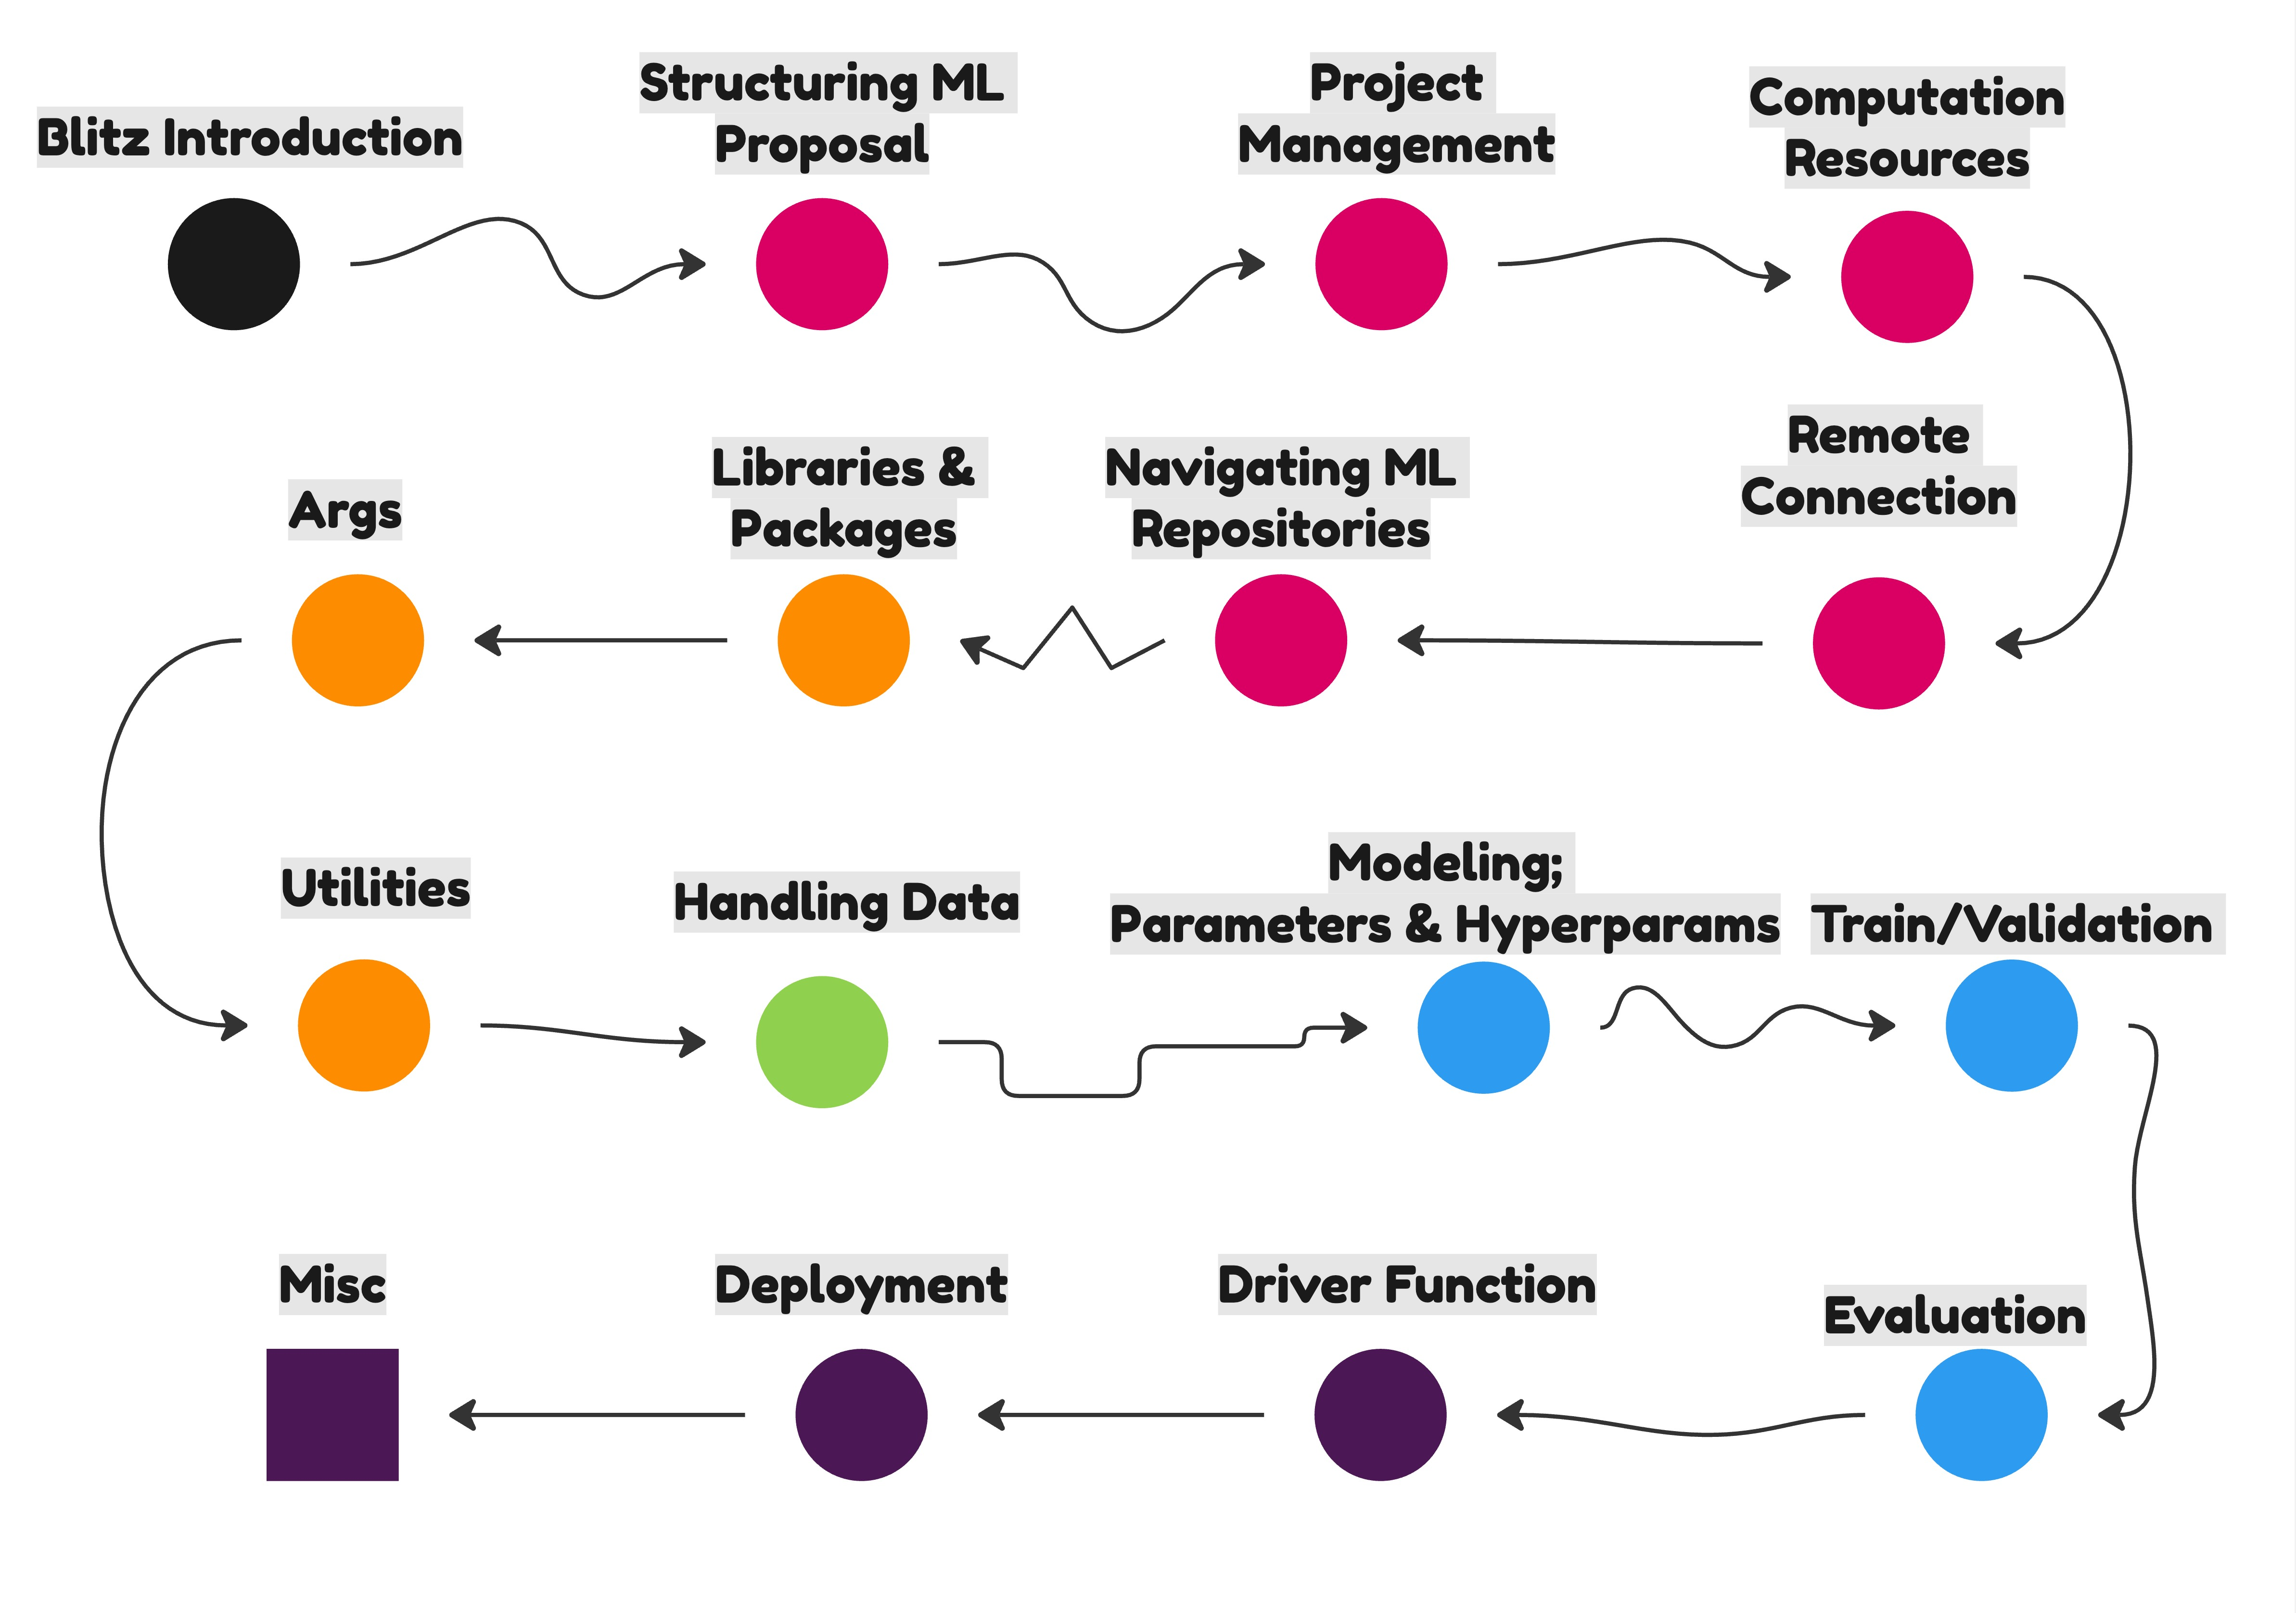

In [229]:
# from IPython.display import Image, display
# display(Image(filename='ML_Patterns_Principles_big_pic.jpg'))

In [7]:
# Talk about the reason behind this project and the dataset and its feature.

# 2) Project Management

In [ ]:
"""
Since this is intended as a prototype, I have implemented all parts of the pipeline
in the simplest yet most effective manner. This approach ensures clarity and
functionality while laying a solid foundation for future enhancements.
Please don't hesitate to book a meeting with me if you'd like to discuss
potential improvements or further developments. I look forward to exploring
ways to optimize and advance this project together.
"""

# 3) Computation resources

In [7]:
"""
I am using Google Colab for this project because it enables quick
dataset downloads and allows others to run my code with ease.
"""

# 4) Libraries ang packages

In [1]:
!pip install -q kaggle --upgrade # to dowanload dataset from Kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 920.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# 5) Args & env variables

In [110]:
from google.colab import files, drive # uploading a file & connecting to gdrive

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import networkx as nx
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.image as mpimg
import random


import os
import gc
# import wandb
import time
import math
import glob
from scipy import spatial
from tqdm import tqdm
import warnings
import cv2
import pandas as pd
import numpy as np
from numpy import dot, sqrt
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from IPython.display import display_html
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import sys

In [22]:
import heapq

In [ ]:
"""
  *** Please watch this very short tutorial on how to get your kaggle.json
  from Kaggle that contains your API key, allowing you to download
  the data directly on Google Colab. This option saves a lot of time and
  resource as the dataset is quiet large (30 Gigabytes)

  https://www.youtube.com/watch?v=57N1g8k2Hwc

"""

files.upload()

In [193]:
# Custom colors
class clr:
    S = '\033[1m' + '\033[95m'
    E = '\033[0m'

my_colors = ["#AF0848", "#E90B60", "#CB2170", "#954E93", "#705D98", "#5573A8", "#398BBB", "#00BDE3"]

bk_image = plt.imread("Bluebackground.jpg")

# 6) Utilities

In [ ]:
def print_bold(text):
    print(f"\033[1m{text}\033[0m")

def get_user_embedding(user_id, embeddings):
    return embeddings[str(user_id)]


def get_rated_items(user_id, df):
    return set(df[df['customer_id'] == user_id]['article_id'])


def calculate_similarities(user_id, df, embeddings, ignore_previous_purchase=True):
    rated_items = get_rated_items(user_id, df)
    user_embedding = get_user_embedding(user_id, embeddings)

    item_similarities = []
    if ignore_previous_purchase:
      for item_id in set(df['article_id']):
          if item_id not in rated_items:
              item_embedding = embeddings[str(item_id)]
              similarity = cosine_similarity([user_embedding], [item_embedding])[0][0]
              item_similarities.append((item_id, similarity))

    if not ignore_previous_purchase:
      for item_id in set(df['article_id']):
            item_embedding = embeddings[str(item_id)]
            similarity = cosine_similarity([user_embedding], [item_embedding])[0][0]
            item_similarities.append((item_id, similarity))
    return item_similarities


def show_images(items, item_name_mapping, num_items, show_similarity=False):
    f, ax = plt.subplots(1, num_items, figsize=(20,10))
    if num_items == 1:
        ax = [ax]
    for i, item in enumerate(items):
        item_id, similarity = item
        print(f"- Item {item_id}: {item_name_mapping[item_id]}", end='')
        if show_similarity:
            print(f" with similarity score: {similarity}")
        else:
            print()
        img_path = f"./data/images/0{str(item_id)[:2]}/0{int(item_id)}.jpg"
        try:
            img = mpimg.imread(img_path)
            ax[i].imshow(img)
            ax[i].set_title(f'Item {item_id}')
            ax[i].set_xticks([], [])
            ax[i].set_yticks([], [])
            ax[i].grid(False)
        except FileNotFoundError:
            print(f"Image for item {item_id} not found.")
    plt.show()


# 7) Data

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100% 28.7G/28.7G [06:04<00:00, 141MB/s]
100% 28.7G/28.7G [06:04<00:00, 84.5MB/s]


In [7]:
!mkdir data/

In [8]:
!unzip -q h-and-m-personalized-fashion-recommendations.zip -d data

In [9]:
!rm h-and-m-personalized-fashion-recommendations.zip

In [51]:
articles = pd.read_csv("./data/articles.csv")
customers = pd.read_csv("../data/customers.csv")
transactions = pd.read_csv("./data/transactions_train.csv")

In [223]:
customers

customer_id   FN  Active  \
0        00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1        0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2        000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3        00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4        00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   
...                                                    ...  ...     ...   
1371975  ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...  NaN     NaN   
1371976  ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...  NaN     NaN   
1371977  ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...  1.0     1.0   
1371978  ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...  1.0     1.0   
1371979  ffffd9ac14e89946416d80e791d064701994755c3ab686...  NaN     NaN   

        club_member_status fashion_news_frequency   age  \
0                   ACTIVE                   NONE  49.0   
1                   ACTIVE                   NONE  25.0   
2                   ACTIVE                   NONE  24.0   
3                   ACTIVE                   NONE  54.0   
4                   ACTIVE              Regularly  52.0   
...                    ...                    ...   ...   
1371975             ACTIVE                   NONE  24.0   
1371976             ACTIVE                   NONE  21.0   
1371977             ACTIVE              Regularly  21.0   
1371978             ACTIVE              Regularly  18.0   
1371979         PRE-CREATE                   NONE  65.0   

                                               postal_code  
0        52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1        2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2        64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3        5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4        25fa5ddee9aac01b35208d01736e57942317d756b32ddd...  
...                                                    ...  
1371975  7aa399f7e669990daba2d92c577b52237380662f36480b...  
1371976  3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...  
1371977  4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...  
1371978  8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...  
1371979  0a1a03306fb2f62164c2a439b38c0caa64b40deaae8687...  

[1371980 rows x 7 columns]

## 7.1 Cleaning the data and visualization

<pr> <strong> Replace missing values </strong> </p>

In [108]:
# Replace missing values
# There are no missing values in any columns but 'Detail Description': 416 total missing values
articles.fillna(value="No Description", inplace=True)

In [181]:
# Get all paths from the image folder
all_image_paths = glob.glob(f"./data/images/*/*")

print(clr.S+"Number of unique article_ids within articles.csv:"+clr.E, len(articles), "\n"+
      clr.S+"Number of unique images within the image folder:"+clr.E, len(all_image_paths), "\n"+
      clr.S+"=> not all article_ids have a corresponding image!!!"+clr.E, "\n")

# Get all valid article ids
# Create a set() - as it moves faster than a list
all_image_ids = set()
all_images_ids_int = []

for path in tqdm(all_image_paths):
    article_id = path.split('/')[-1].split('.')[0]
    all_image_ids.add(article_id)
    all_images_ids_int.append(int(article_id))


Number of unique article_ids within articles.csv: 105542 
Number of unique images within the image folder: 105100 
=> not all article_ids have a corresponding image!!! 



100%|██████████| 105100/105100 [00:00<00:00, 380598.16it/s]


In [183]:
# Create full path to the article image
images_path = "./data/images/"
articles["path"] = images_path + articles["product_code"].astype(str) + "/" + articles["article_id"].astype(str) + ".jpg"

# Adjust the incorrect paths and set them to None
for k, article_id in tqdm(enumerate(articles["article_id"])):
    if article_id not in all_images_ids_int:
        articles.loc[k, "path"] = None

105542it [01:48, 975.28it/s] 


In [166]:
articles["article_id"]

0         108775015
1         108775044
2         108775051
3         110065001
4         110065002
            ...    
105537    953450001
105538    953763001
105539    956217002
105540    957375001
105541    959461001
Name: article_id, Length: 105542, dtype: int64

Total Number of unique Product Names: 45875


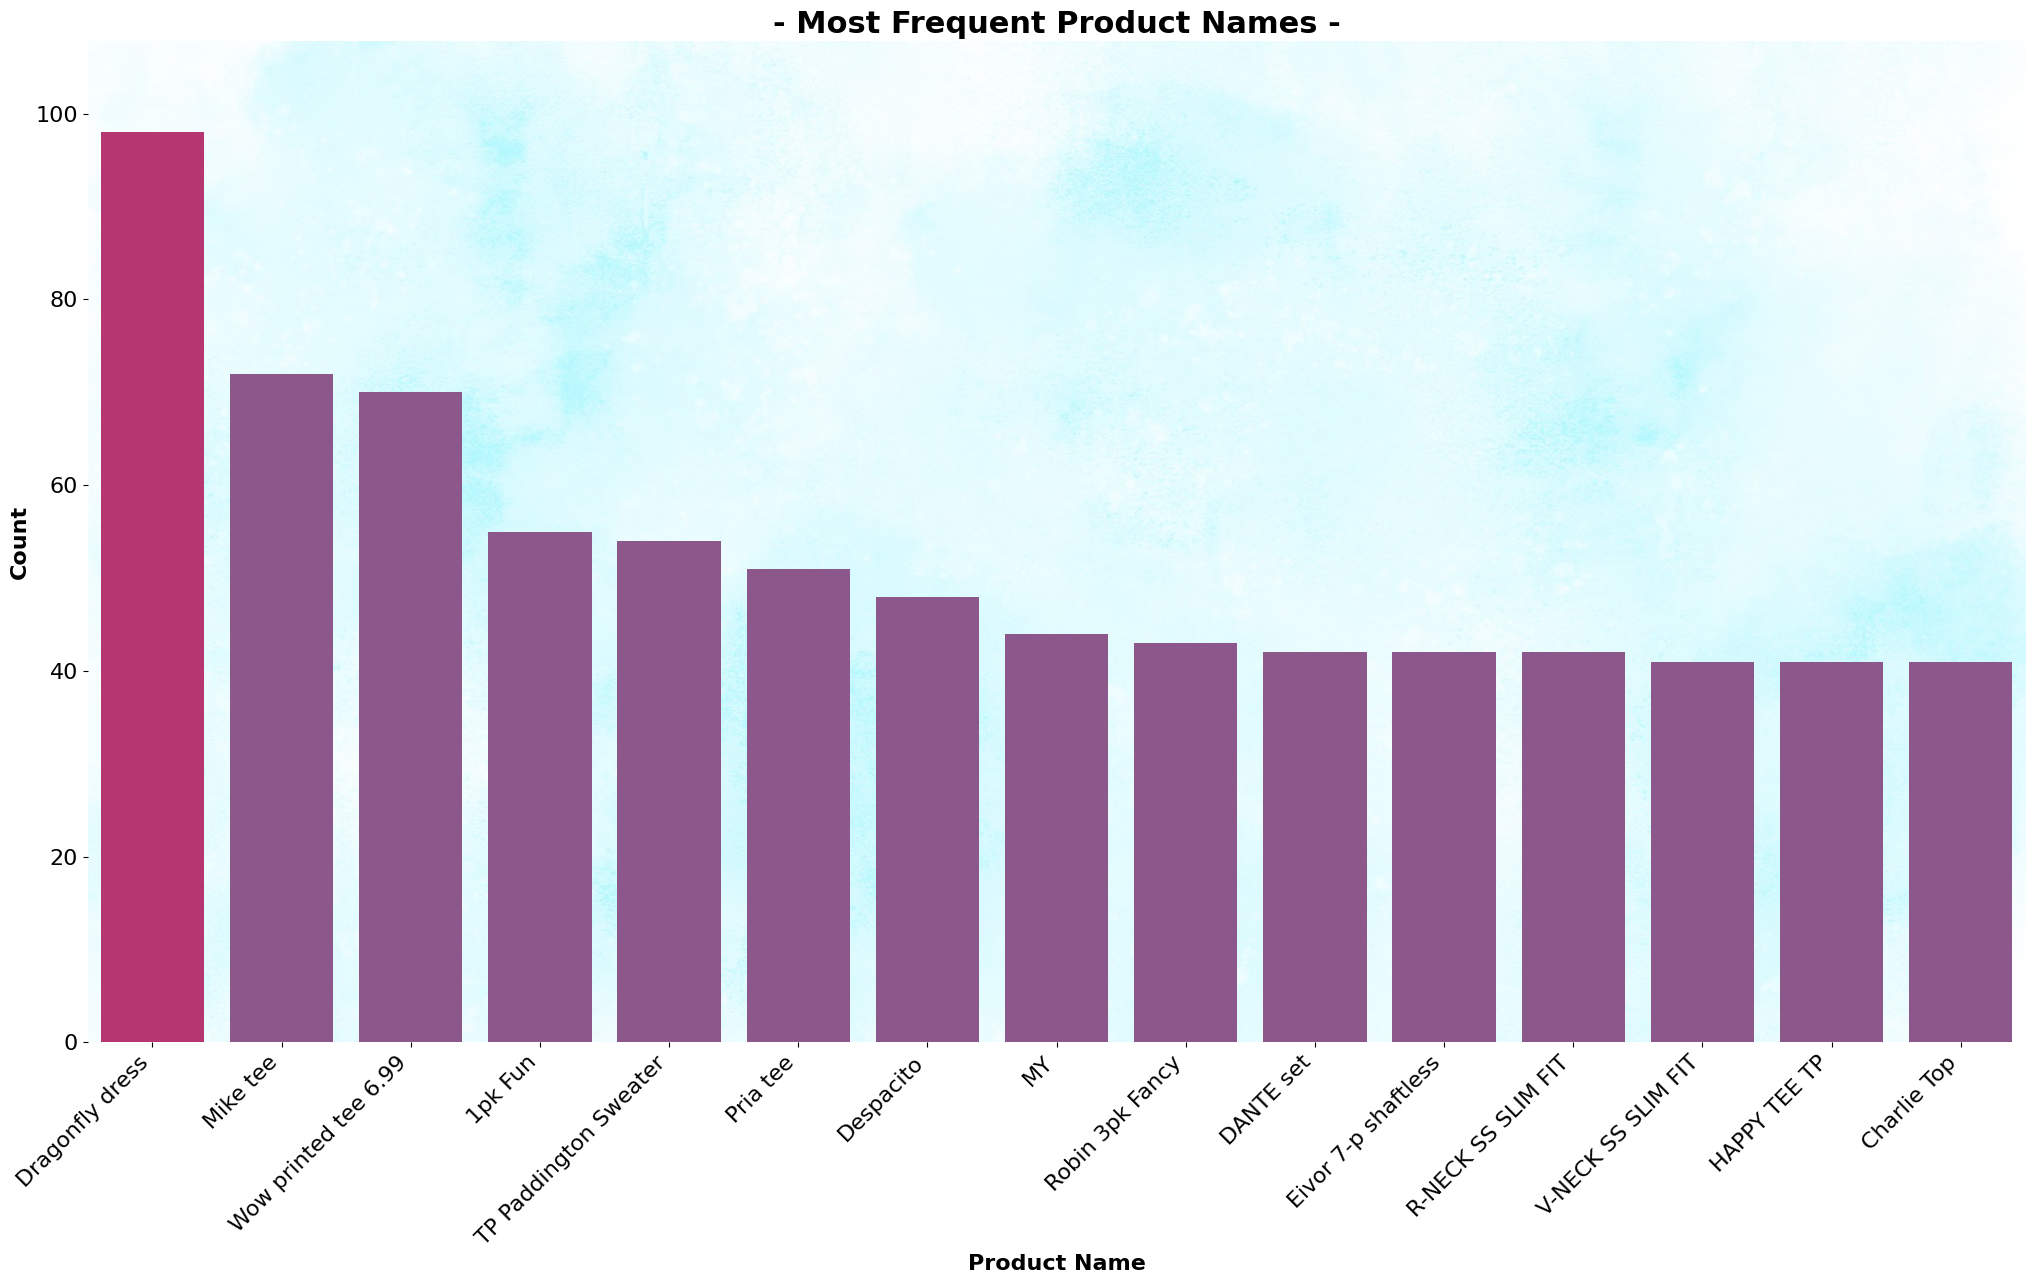

In [217]:
# Data preparation
prod_name = articles["prod_name"].value_counts().reset_index().head(15)
prod_name.columns = ["prod_name", "count"]
total_prod_names = articles["prod_name"].nunique()
clrs = ["#CB2170" if x == max(prod_name["count"]) else '#954E93' for x in prod_name["count"]]

# Get images
prod_name_images = articles[articles["prod_name"].isin(prod_name["prod_name"].tolist())].groupby("prod_name")["path"].first().reset_index()
image_paths = prod_name_images["path"].tolist()
image_names = prod_name_images["prod_name"].tolist()

# Plot
fig, ax = plt.subplots(figsize=(25, 13))
plt.title('- Most Frequent Product Names -', size=22, weight="bold")

# Add background image
bk_image = plt.imread('Bluebackground.jpg')
ax.imshow(bk_image, aspect='auto', extent=[-0.5, len(prod_name)-0.5, 0, max(prod_name["count"])*1.1], zorder=0, alpha=0.3)

# Adjust hue to avoid FutureWarning
sns.barplot(data=prod_name, x="prod_name", y="count", ax=ax, hue="prod_name", dodge=False, palette=clrs, legend=False)

plt.ylabel("Count", size=16, weight="bold")
plt.xlabel("Product Name", size=16, weight="bold")
plt.xticks(rotation=45, ha="right", fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

sns.despine(left=True, bottom=True)
plt.show()


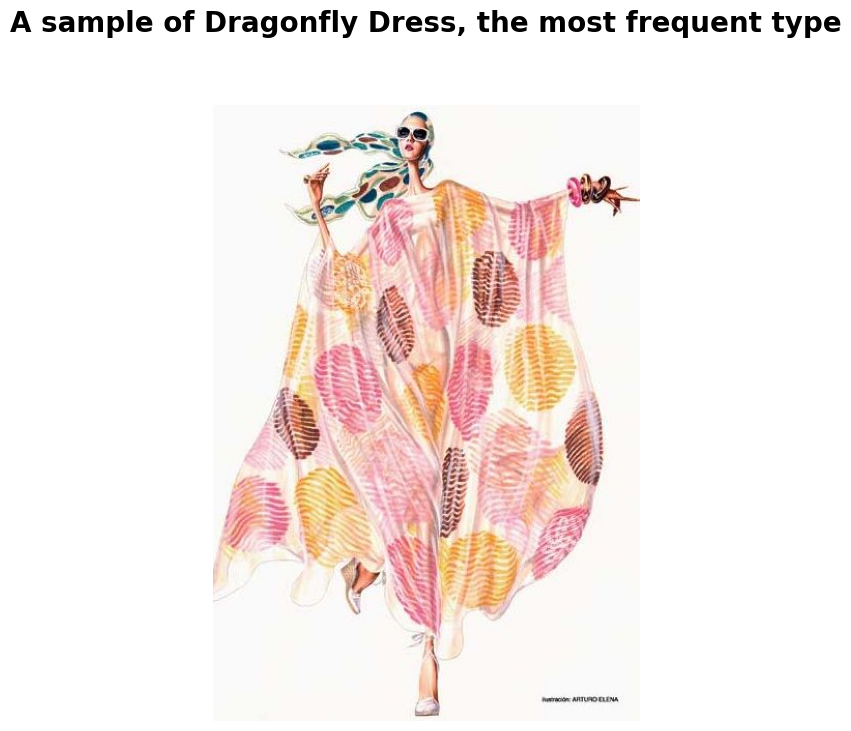

In [216]:
# Load the image
image_path = 'dragonfly.jpg'
img = mpimg.imread(image_path)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)
ax.axis('off')
plt.title('A sample of Dragonfly Dress, the most frequent type\n\n', size=20, weight='bold')
plt.show()

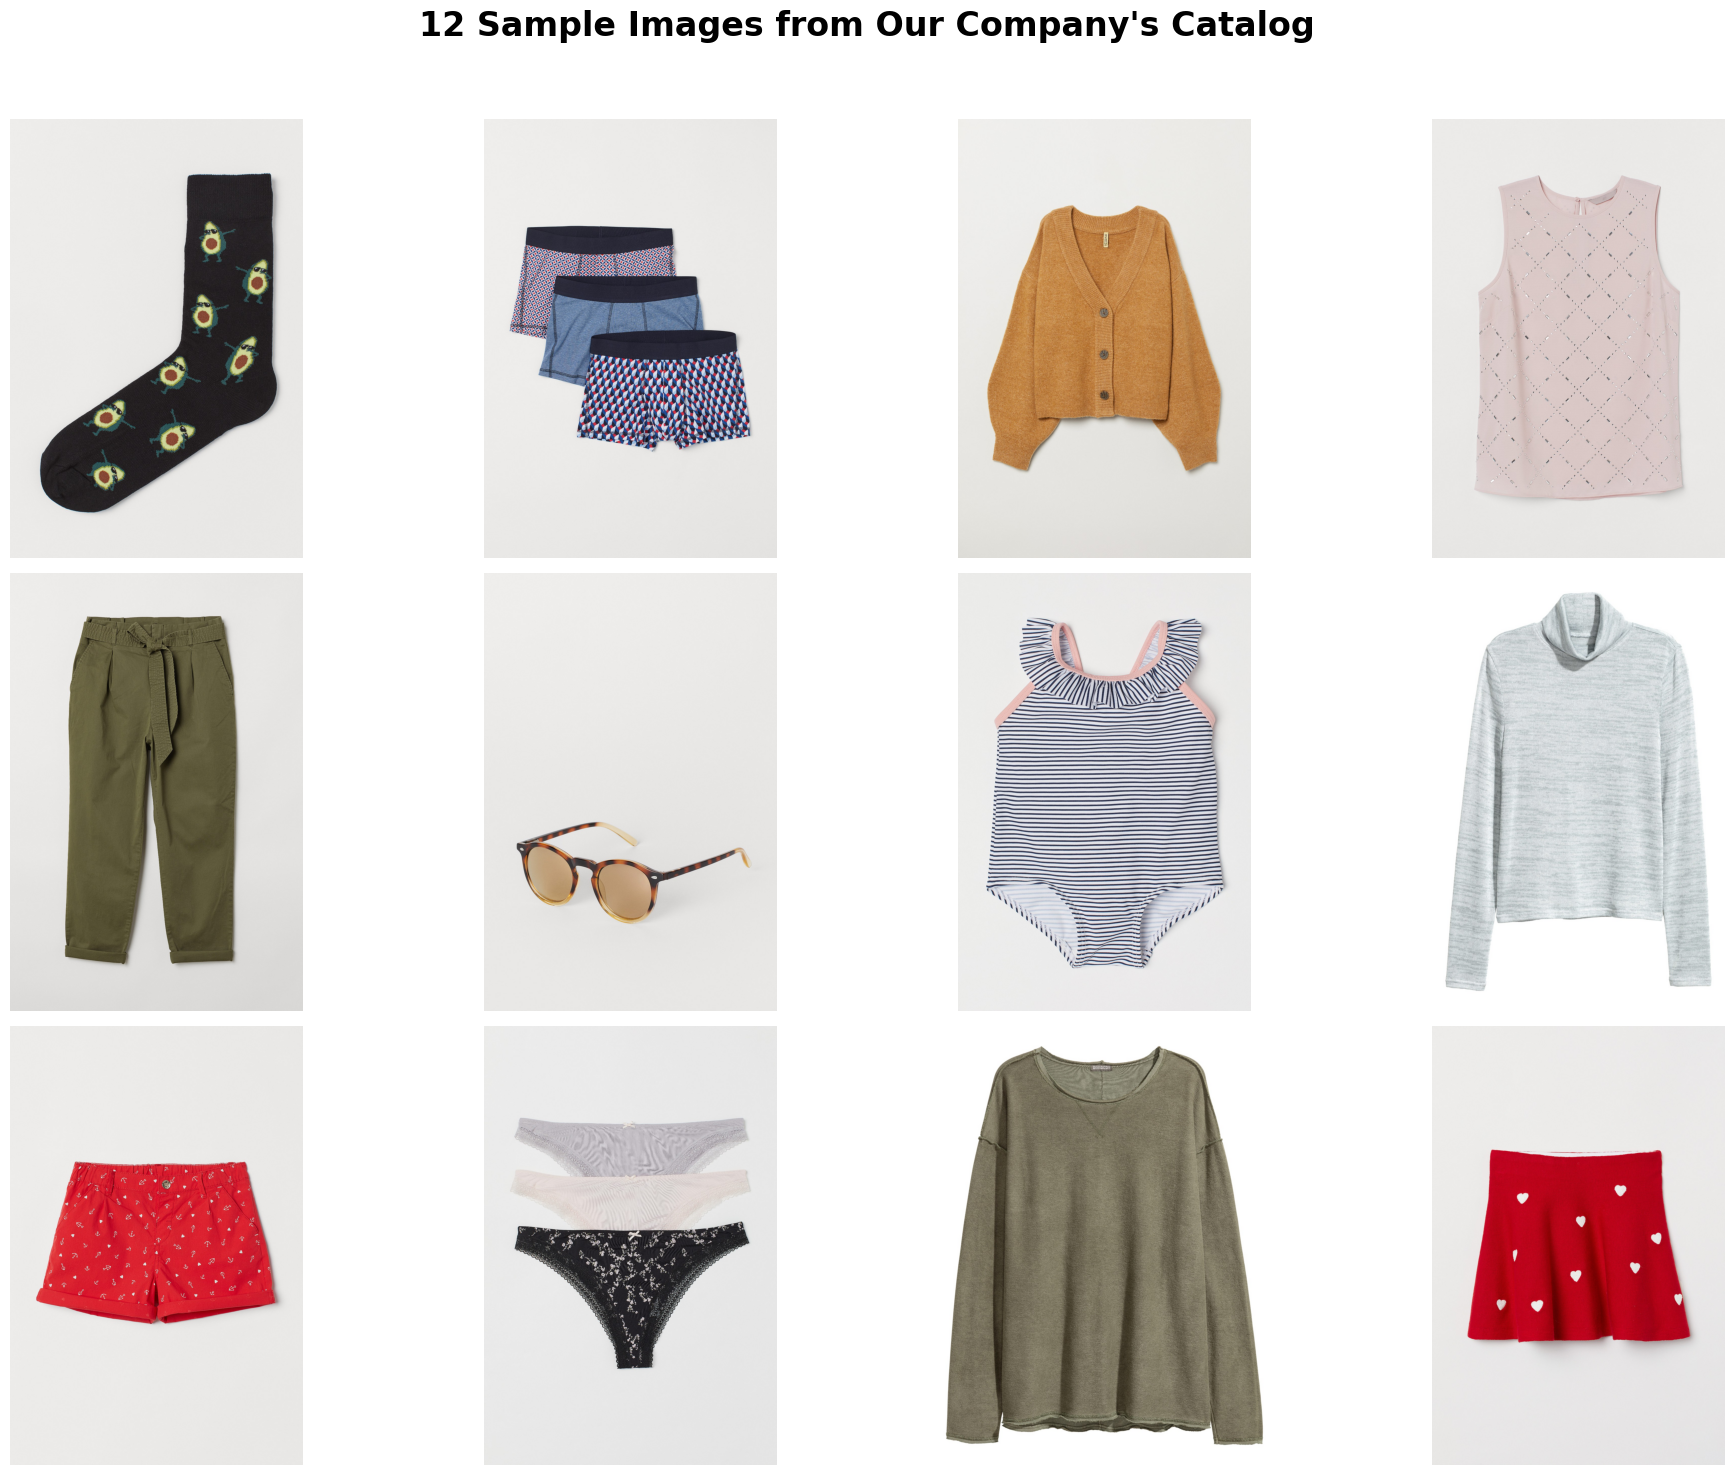

In [222]:
# Sample 12 image paths from all_image_paths
sampled_paths = random.sample(all_image_paths, 12)

# Create a figure
fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 3 rows, 4 columns
fig.suptitle('12 Sample Images from Our Company\'s Catalog\n\n', fontsize=24, weight='bold')

# Iterate over the sampled paths and plot them
for i, ax in enumerate(axs.flat):
    img = mpimg.imread(sampled_paths[i])
    ax.imshow(img)
    ax.axis('off')  # Hide axes
    # ax.set_title(f'Image {i+1}', size=16)

# Adjust layout
plt.tight_layout()
plt.show()



**Customers informaiton exploratory data analysis**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB
None
                                              customer_id        FN    Active  \
count                                             1371980  476930.0  464404.0   
unique                                            1371980       NaN       NaN   
top     00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...       NaN       NaN   
freq       

<ipython-input-224-1bc9be2b63be>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='fashion_news_frequency', palette='viridis')
<ipython-input-224-1bc9be2b63be>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customers, x='Active', y='age', palette='coolwarm')


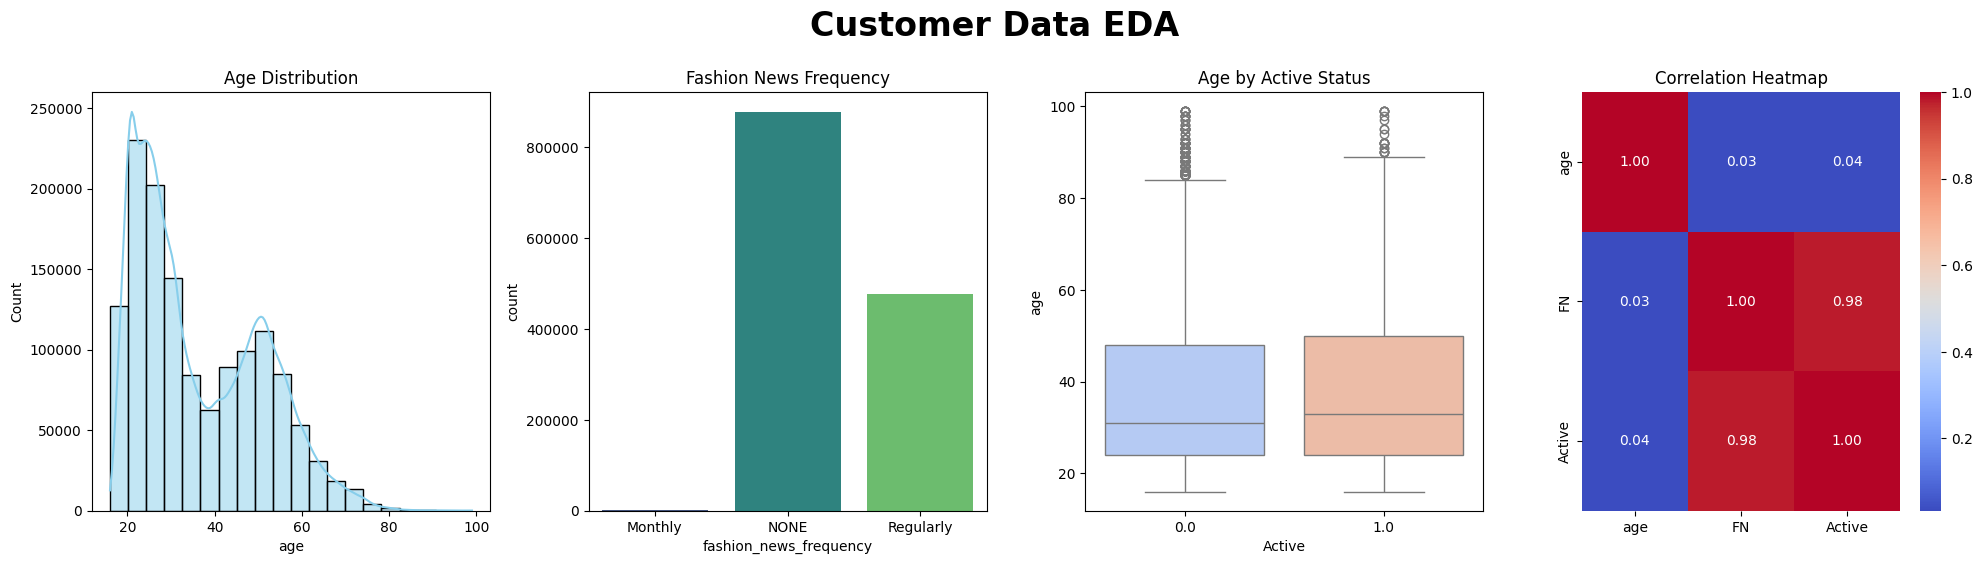

In [224]:
# Inspect the data
print(customers.info())
print(customers.describe(include='all'))
print(customers.head())

# Clean and process data
customers['FN'].fillna(0, inplace=True)
customers['Active'].fillna(0, inplace=True)
customers['club_member_status'] = customers['club_member_status'].astype('category')
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].astype('category')
customers['age'] = pd.to_numeric(customers['age'], errors='coerce')

# Visualizations
plt.figure(figsize=(20, 15))

# Age Distribution
plt.subplot(3, 4, 1)
sns.histplot(customers['age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

# Fashion News Frequency Distribution
plt.subplot(3, 4, 2)
sns.countplot(data=customers, x='fashion_news_frequency', palette='viridis')
plt.title('Fashion News Frequency')

# Active Status by Age
plt.subplot(3, 4, 3)
sns.boxplot(data=customers, x='Active', y='age', palette='coolwarm')
plt.title('Age by Active Status')

# Correlation Heatmap
plt.subplot(3, 4, 4)
correlation = customers[['age', 'FN', 'Active']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

# Sample Images (Replace with actual image paths and titles if needed)
def display_image(image_path, title, position):
    img = mpimg.imread(image_path)
    plt.subplot(3, 4, position)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

# Example image (Replace 'example_image.jpg' with actual image path)
# display_image('example_image.jpg', 'Sample Image Title', position=5)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for the suptitle
plt.suptitle('Customer Data EDA', fontsize=24, weight='bold')
plt.show()

## 7.2) Preparing data | Train/Test split

In [52]:
item_freq = transactions.groupby('article_id')['customer_id'].nunique()
user_freq = transactions.groupby('customer_id')['article_id'].nunique()

items = item_freq[item_freq >= 100].index
users = user_freq[user_freq >= 100].index

filtered_df = transactions[transactions['article_id'].isin(items) & transactions['customer_id'].isin(users)]

In [53]:
users.shape

(40537,)

In [54]:
freq = filtered_df.groupby(['customer_id', 'article_id']).size().reset_index(name='frequency')

GraphTravel_HM = filtered_df.merge(freq, on=['customer_id', 'article_id'], how='left')

GraphTravel_HM = GraphTravel_HM[GraphTravel_HM['frequency'] >= 10]


In [65]:
unique_customer_ids = GraphTravel_HM['customer_id'].unique()
customer_id_mapping = {id: i for i, id in enumerate(unique_customer_ids)}
GraphTravel_HM['customer_id'] = GraphTravel_HM['customer_id'].map(customer_id_mapping)

In [69]:
## Convert the 't_dat' column to datetime format
GraphTravel_HM['t_dat'] = pd.to_datetime(GraphTravel_HM['t_dat'])

# Split the dataframe into two based on the date '2020-08-22'
date_split = pd.to_datetime('2020-08-22')

GraphTravel_HM_train = GraphTravel_HM[GraphTravel_HM['t_dat'] < date_split].copy()
GraphTravel_HM_test = GraphTravel_HM[GraphTravel_HM['t_dat'] >= date_split].copy()

In [67]:
display(GraphTravel_HM)

print("unique customer_id" , GraphTravel_HM.customer_id.nunique())
print("unique article_id" , GraphTravel_HM.article_id.nunique())

t_dat  customer_id  article_id     price  sales_channel_id  \
194      2018-09-20            0   399201022  0.059305                 2   
195      2018-09-20            0   399201022  0.059305                 2   
196      2018-09-20            0   399201022  0.059305                 2   
1181     2018-09-20            1   228257001  0.006763                 2   
1182     2018-09-20            1   228257001  0.006797                 2   
...             ...          ...         ...       ...               ...   
6998469  2020-09-22          918   554450043  0.033881                 2   
6998949  2020-09-22          671   160442010  0.012898                 2   
6998950  2020-09-22          671   160442010  0.012915                 2   
6998951  2020-09-22          671   160442010  0.012898                 2   
7002790  2020-09-22          524   685816002  0.008458                 1   

         frequency  
194             12  
195             12  
196             12  
1181            19  
1182            19  
...            ...  
6998469         18  
6998949         11  
6998950         11  
6998951         11  
7002790         13  

[20504 rows x 6 columns]

unique customer_id 1013
unique article_id 922


In [104]:
# GraphTravel_HM_train

In [105]:
# GraphTravel_HM_test

In [73]:
# prompt: GraphTravel_HM summarize this dataframe

GraphTravel_HM.info()
GraphTravel_HM.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 20504 entries, 194 to 7002790
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   t_dat             20504 non-null  datetime64[ns]
 1   customer_id       20504 non-null  int64         
 2   article_id        20504 non-null  int64         
 3   price             20504 non-null  float64       
 4   sales_channel_id  20504 non-null  int64         
 5   frequency         20504 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.6 MB


t_dat   customer_id    article_id  \
count                          20504  20504.000000  2.050400e+04   
mean   2019-08-11 13:05:01.989855744    450.599542  5.845711e+08   
min              2018-09-20 00:00:00      0.000000  1.087750e+08   
25%              2019-02-15 00:00:00    165.000000  5.079090e+08   
50%              2019-07-25 00:00:00    427.000000  6.557840e+08   
75%              2020-01-20 00:00:00    708.000000  7.166720e+08   
max              2020-09-22 00:00:00   1012.000000  9.337060e+08   
std                              NaN    302.635083  2.026352e+08   

              price  sales_channel_id     frequency  
count  20504.000000      20504.000000  20504.000000  
mean       0.019039          1.833545     32.605735  
min        0.000322          1.000000     10.000000  
25%        0.008458          2.000000     11.000000  
50%        0.013559          2.000000     13.000000  
75%        0.025407          2.000000     19.000000  
max        0.118627          2.000000    570.000000  
std        0.014627          0.372498     91.669123

<ipython-input-74-6863d40b86e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GraphTravel_HM_train['frequency'], kde=True, bins=30)


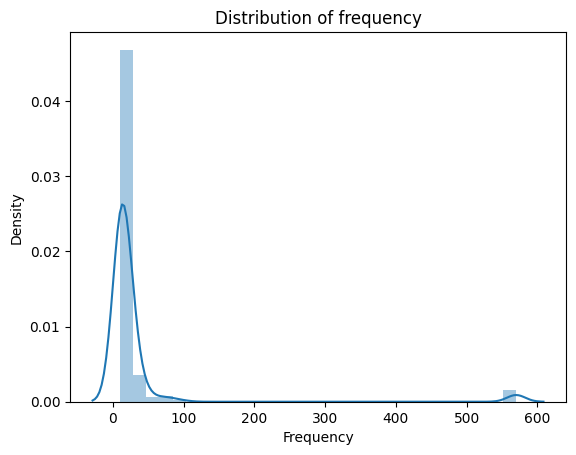

In [74]:
sns.distplot(GraphTravel_HM_train['frequency'], kde=True, bins=30)

plt.title('Distribution of frequency')
plt.xlabel('Frequency')
plt.ylabel('Density')

plt.show()

In [75]:
unique_customer_ids = GraphTravel_HM_train['customer_id'].unique()
customer_id_mapping = {id: i for i, id in enumerate(unique_customer_ids)}
GraphTravel_HM_train['customer_id'] = GraphTravel_HM_train['customer_id'].map(customer_id_mapping)

item_name_mapping = dict(zip(articles['article_id'], articles['prod_name'])) # prod_name

# 8) Modeling

In [76]:
G = nx.Graph()

for index, row in GraphTravel_HM_train.iterrows():
    G.add_node(row['customer_id'], type='user')
    G.add_node(row['article_id'], type='item')
    G.add_edge(row['customer_id'], row['article_id'], weight=row['frequency'])

In [87]:
def biased_random_walk(G, start_node, walk_length, p=1, q=1):
    walk = [start_node]
    while len(walk) < walk_length:
        cur_node = walk[-1]
        cur_neighbors = list(G.neighbors(cur_node))

        if len(cur_neighbors) > 0:
            if len(walk) == 1:
                walk.append(random.choice(cur_neighbors))
            else:
                prev_node = walk[-2]

                probability = []
                for neighbor in cur_neighbors:
                    if neighbor == prev_node:
                        # Return parameter
                        probability.append(1/p)
                    elif G.has_edge(neighbor, prev_node):
                        # Stay parameter
                        probability.append(1)
                    else:
                        # In-out parameter
                        probability.append(1/q)

                probability = np.array(probability)
                probability = probability / probability.sum()  # normalize

                next_node = np.random.choice(cur_neighbors, p=probability)
                walk.append(next_node)
        else:
            break
    return walk


def generate_walks(G, num_walks, walk_length, p=1, q=1):
    walks = []
    nodes = list(G.nodes())
    for _ in range(num_walks):
        random.shuffle(nodes)  # to ensure randomness
        for node in nodes:
            walk_from_node = biased_random_walk(G, node, walk_length, p, q)
            walks.append(walk_from_node)
    return walks


def recommend_new_items(user_id, df, embeddings, item_name_mapping, num_items=5, similarity_threshold=0.5):
    rated_items = get_rated_items(user_id, df)

    print(f"User {user_id} has purchased:")
    show_images([(item_id, 0) for item_id in list(rated_items)[:5]], item_name_mapping, min(len(rated_items), 5))

    # Calculate similarities
    item_similarities = calculate_similarities(user_id, df, embeddings)

    # Filter items based on a similarity threshold
    filtered_similarities = [item for item in item_similarities if item[0] > similarity_threshold]

    # Use a heap to get the top k items based on similarity
    top_k_items = heapq.nlargest(num_items, filtered_similarities, key=lambda x: x[-1])

    print(f"\nRecommended items for user {user_id}:")
    show_images(top_k_items, item_name_mapping, num_items, show_similarity=True)


def predict_items(user_id, df, embeddings, item_name_mapping, num_items=5, similarity_threshold=0.2):
    # Calculate similarities
    item_similarities = calculate_similarities(user_id, df, embeddings, ignore_previous_purchase=False)

    # Filter items based on a similarity threshold
    filtered_similarities = [item for item in item_similarities if item[0] > similarity_threshold]

    # Use a heap to get the top k items based on similarity
    top_k_items = heapq.nlargest(num_items, filtered_similarities, key=lambda x: x[-1])
    items, similarities = zip(*top_k_items)
    return list(items)


# 9) Train/Validation

In [78]:
# Random Walk
walks = generate_walks(G, num_walks=10, walk_length=40, p=9, q=1)
filtered_walks = [walk for walk in walks if len(walk) >= 5]

# to String  (for Word2Vec input)
walks = [[str(node) for node in walk] for walk in walks]

# Training Word2Vec model for 10 epochs
model = Word2Vec(walks, vector_size=128, window=10, min_count=0,  hs=1, sg=1, negative=0, workers=4, epochs=10)

# node embedding
embeddings = {node_id: model.wv[node_id] for node_id in model.wv.index_to_key}


# 10) Evaluation (Using Precision)

User 45 has purchased:
- Item 598811011: Dingo tank
- Item 189616006: Heavy jsy long leg
- Item 598517002: SANDY shorts
- Item 633808016: Terrier tee TOP PRODUCT
- Item 443696021: BO basic OH BB


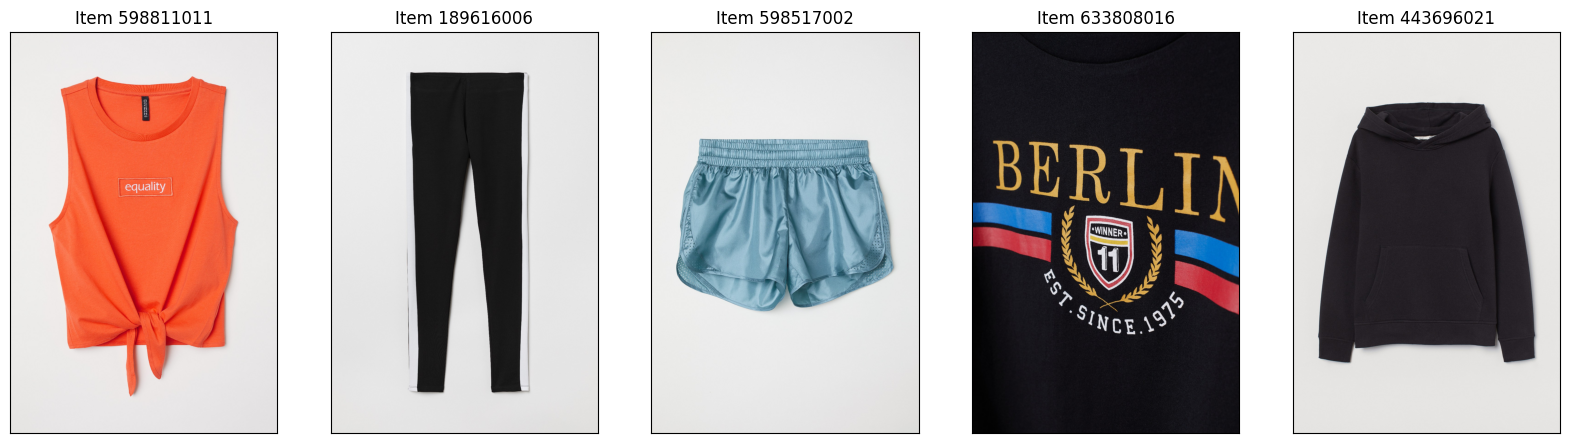


Recommended items for user 45:
- Item 568597022: Hayes slim with similarity score: 0.8273650407791138
- Item 477107015: Ellen Bikini Clover Mid 3p with similarity score: 0.6951514482498169
- Item 665851001: Benny Slipper with similarity score: 0.6919260025024414
- Item 816563002: Drizzle with similarity score: 0.6881619691848755
- Item 657283008: LS TANGA TWIST with similarity score: 0.6720776557922363


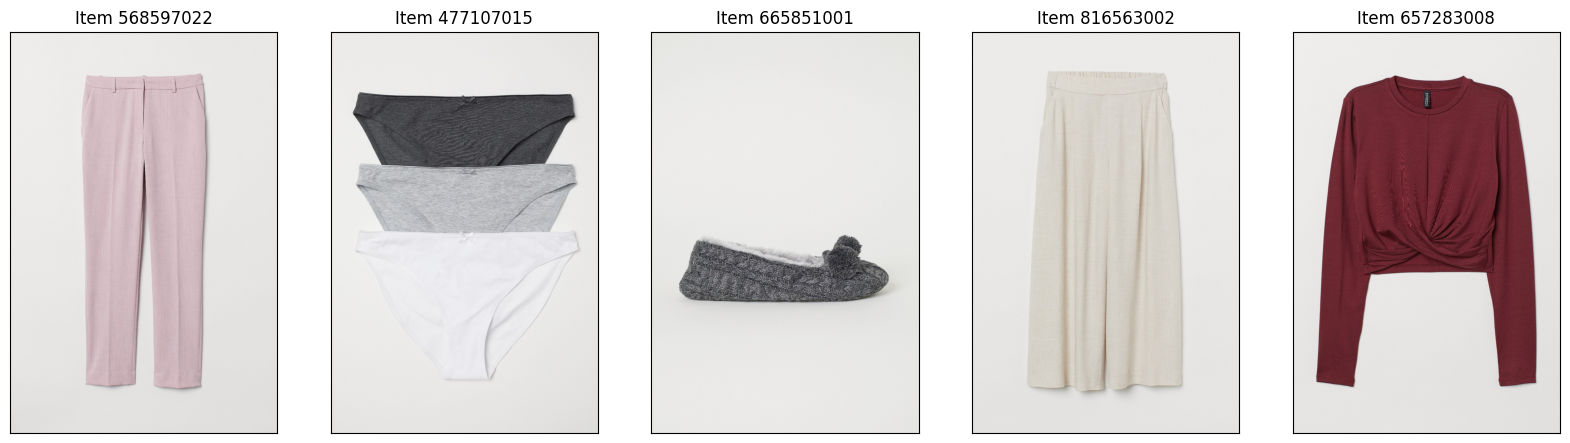

In [79]:
recommend_new_items(45, GraphTravel_HM_train, embeddings, item_name_mapping, num_items=5)

In [80]:
# Step 1: Identify customers in test who exist in train
customers_in_both = set(GraphTravel_HM_test['customer_id']).intersection(set(GraphTravel_HM_train['customer_id']))

# Step 2: Create article_id set from train for filtering
article_ids_in_train = set(GraphTravel_HM_train['article_id'])

# Step 3: Initialize the new DataFrame
result_data = {
    'customer_id': [],
    'purchases': [],
    'predictions': []
}

# Step 4: Populate the new DataFrame
for customer_id in customers_in_both:
    # Get purchased items in test that are also in train
    purchased_items = GraphTravel_HM_test[(GraphTravel_HM_test['customer_id'] == customer_id) &
                                          (GraphTravel_HM_test['article_id'].isin(article_ids_in_train))]['article_id'].tolist()
    if purchased_items:
        result_data['customer_id'].append(customer_id)
        result_data['purchases'].append(list(set(purchased_items)))
        result_data['predictions'].append([])  # Empty list for predictions

# Step 5: Create the final DataFrame
result_df = pd.DataFrame(result_data)

# Display the result
print(result_df)

    customer_id               purchases predictions
0             4             [182909001]          []
1             9             [624257001]          []
2           524             [685816002]          []
3           525             [160442010]          []
4            24  [579541001, 399256001]          []
..          ...                     ...         ...
85         1001             [915487001]          []
86         1003             [864415003]          []
87          498             [678942001]          []
88          500  [160442010, 160442007]          []
89          511             [706016001]          []

[90 rows x 3 columns]


In [91]:
## Making predicitons for the customers' next month purchase
for index, row in result_df.iterrows():
  result_df.at[index, 'predictions'] = predict_items(row['customer_id'], GraphTravel_HM_train, embeddings, item_name_mapping, num_items=len(row['purchases']))



In [103]:
# Step 1: Calculate precision for each customer
result_df['precision'] = result_df.apply(lambda row: len(set(row['purchases']).intersection(row['predictions'])) / len(row['predictions']) if row['predictions'] else 0, axis=1)

# Step 2: Calculate overall precision
overall_precision = result_df['precision'].mean()

# Display the DataFrame with precision for each customer and the overall precision
print(result_df)
print_bold(f"\n\n\n****\tOverall Precision: {overall_precision:.2f}    \t****\n\n")

    customer_id               purchases             predictions  precision
0             4             [182909001]             [182909001]        1.0
1             9             [624257001]             [624257001]        1.0
2           524             [685816002]             [685816002]        1.0
3           525             [160442010]             [160442010]        1.0
4            24  [579541001, 399256001]  [579541001, 399256001]        1.0
..          ...                     ...                     ...        ...
85         1001             [915487001]             [915487001]        1.0
86         1003             [864415003]             [864415003]        1.0
87          498             [678942001]             [678942001]        1.0
88          500  [160442010, 160442007]  [160442010, 160442007]        1.0
89          511             [706016001]             [706016001]        1.0

[90 rows x 4 columns]



****	Overall Precision: 0.81    	****




# 12) Deployment & Maintenance

In [ ]:
# Let's discuss the maitenance, which is the most important part.

# 13) References

In [232]:
# GenAI was used for debugging the code and enhancing the performance

In [ ]:
"""
https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview
https://www.kaggle.com/code/andradaolteanu/h-m-eda-rapids-and-similarity-recommenders/notebook
https://www.kaggle.com/code/datark1/detailed-eda-understanding-h-m-data
https://www.kaggle.com/code/khyj00/gnns-similarity-recommendation-based-on-node2vec
https://www.youtube.com/watch?v=-VX6G6C-xPk
https://www.youtube.com/watch?v=57N1g8k2Hwc
"""